In [1]:
import pandas as pd


apps = pd.read_csv("googleplaystore.csv")
reviews = pd.read_csv("googleplaystore_user_reviews.csv")

print("App Data Shape:", apps.shape)
print("User Review Data Shape:", reviews.shape)

merged_df = pd.merge(reviews, apps, on='App', how='inner')
merged_df.head()

App Data Shape: (10841, 13)
User Review Data Shape: (64295, 5)


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,NaN,NaN,NaN,NaN,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


In [2]:

merged_df = merged_df.dropna(subset=['Sentiment', 'Rating'])

merged_df['Rating'] = pd.to_numeric(merged_df['Rating'], errors='coerce')
merged_df = merged_df.dropna(subset=['Rating'])
merged_df.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
6,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


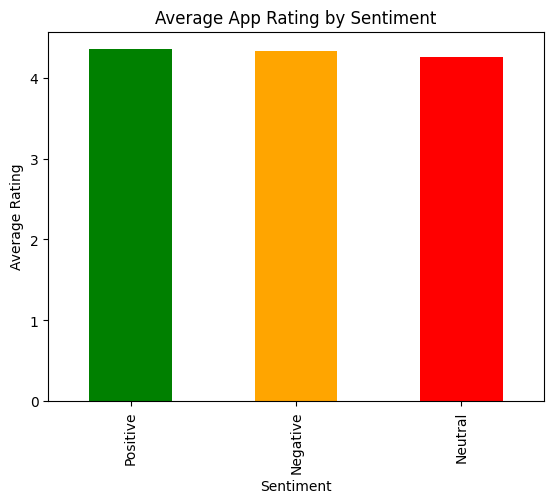

Sentiment
Positive    4.351265
Negative    4.326674
Neutral     4.250761
Name: Rating, dtype: float64

In [3]:
import matplotlib.pyplot as plt

sentiment_rating = merged_df.groupby('Sentiment')['Rating'].mean().sort_values(ascending=False)
sentiment_rating.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Average App Rating by Sentiment")
plt.ylabel("Average Rating")
plt.show()

sentiment_rating

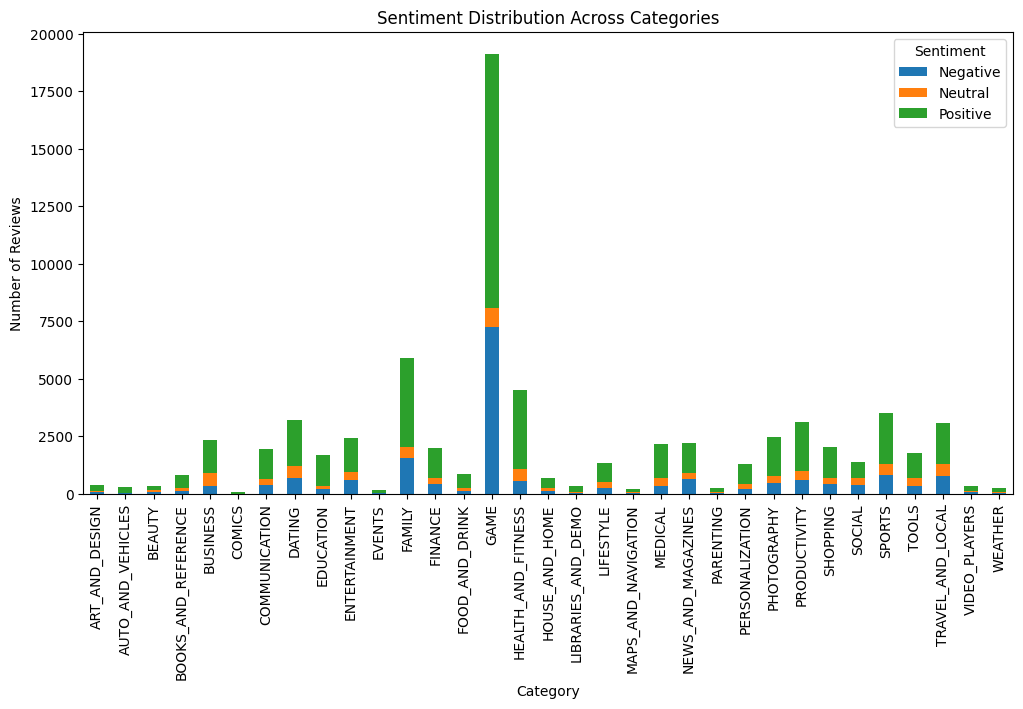

In [4]:
category_sentiment = merged_df.groupby(['Category', 'Sentiment']).size().unstack().fillna(0)
category_sentiment.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Sentiment Distribution Across Categories")
plt.ylabel("Number of Reviews")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
merged_df = merged_df.dropna(subset=['Sentiment_Polarity'])
X = merged_df[['Sentiment_Polarity']]
y = merged_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Squared Error: 0.079
R² Score: 0.003


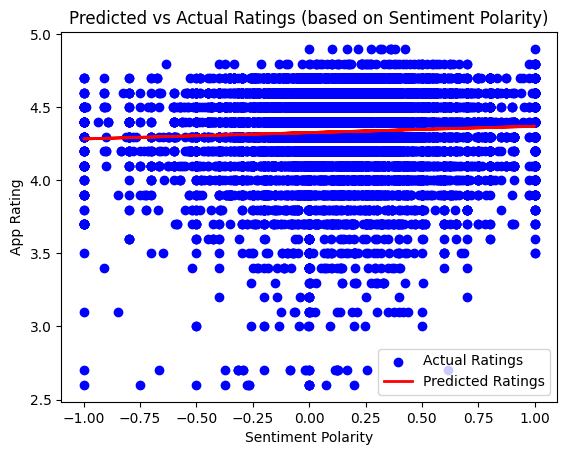

In [6]:
plt.scatter(X_test, y_test, color='blue', label='Actual Ratings')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Ratings')
plt.title("Predicted vs Actual Ratings (based on Sentiment Polarity)")
plt.xlabel("Sentiment Polarity")
plt.ylabel("App Rating")
plt.legend()
plt.show()
